<a href="https://colab.research.google.com/github/VaishnaviKanade/BlogWebsite/blob/main/Plant_Diesease_classfication1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import zipfile
import os

# Unzip dataset
zip_file_path = '/content/drive/MyDrive/Plant_diesease_Dataset-20240519T133336Z-001.zip'
extract_dir = '/content/drive/MyDrive/Plant_diesease_Datasetfolder'

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2750 images belonging to 18 classes.
Found 679 images belonging to 18 classes.
Epoch 1/25
85/85 [==============================] - 207s 2s/step - loss: 2.2829 - accuracy: 0.3083 - val_loss: 1.4334 - val_accuracy: 0.5342
Epoch 2/25
85/85 [==============================] - 217s 3s/step - loss: 1.3652 - accuracy: 0.5556 - val_loss: 1.1843 - val_accuracy: 0.6473
Epoch 3/25
85/85 [==============================] - 207s 2s/step - loss: 0.9978 - accuracy: 0.6726 - val_loss: 0.8939 - val_accuracy: 0.7247
Epoch 4/25
85/85 [==============================] - 215s 3s/step - loss: 0.8402 - accuracy: 0.7127 - val_loss: 0.7086 - val_accuracy: 0.7783
Epoch 5/25
85/85 [==============================] - 204s 2s/step - loss: 0.7272 - accuracy: 0.7487 - val_loss: 0.6241 - val_accuracy: 0.8021
Epoch 6/25
85/85 [==============================] - 203s 2s/step - loss: 0.6309 - accuracy: 0.7855 - val_loss: 0.6825 - val_accuracy: 0.8125
Epoch 7/25
85/85 [==============================] - 209s 2s/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


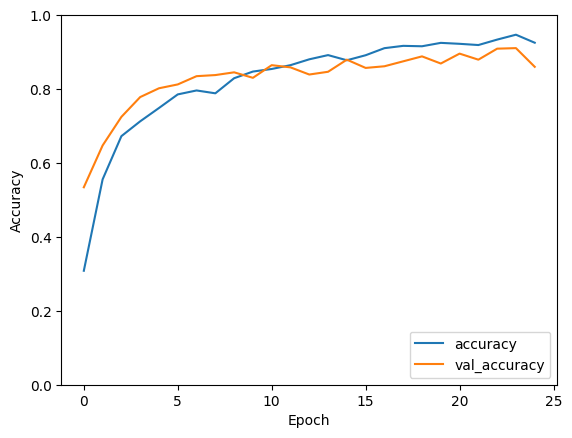

In [ ]:
# Directory paths
dataset_dir = '/content/drive/MyDrive/Plant_diesease_Datasetfolder/Plant_diesease_Dataset'

# Image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Generating training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generating validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Save the model
model.save('/content/drive/MyDrive/Plant_diesease_Datasetfolder/Plant_diesease_Dataset/plant_disease_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Plant_diesease_Datasetfolder/Plant_diesease_Dataset/plant_disease_model.h5')

# Function to classify an image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the class label based on the directory structure
    class_labels = train_generator.class_indices
    class_labels = dict((v, k) for k, v in class_labels.items())
    predicted_label = class_labels[predicted_class_index]

    return predicted_label

# Test the model with a new image
img_path = '/content/drive/MyDrive/Plant_diesease_Datasetfolder/Plant_diesease_Dataset/Peach___Bacterial_spot/image (1015).JPG'
result = classify_image(img_path)
print(f'The image is classified as: {result}')


1/1 [==============================] - 0s 176ms/step
The image is classified as: Peach___Bacterial_spot


In [ ]:
img_path = '/content/drive/MyDrive/Plant_diesease_My_folder/Plant_diesease_Dataset/Cherry___healthy/image (119).JPG'
result = classify_image(img_path)
print(f'The image is classified as: {result}')

1/1 [==============================] - 0s 43ms/step
The image is classified as: Cherry___healthy


In [ ]:
img_path = '/content/drive/MyDrive/Plant_diesease_My_folder/Plant_diesease_Dataset/Apple___Black_rot/image (130).JPG'
result = classify_image(img_path)
print(f'The image is classified as: {result}')

1/1 [==============================] - 0s 48ms/step
The image is classified as: Apple___Black_rot
